In [82]:
# importing libraries
import numpy as np 
import pandas as pd 
import re
import nltk 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [63]:
!pip install -U textblob

In [64]:
# import necessary modules
from extract_dataframe import read_json       
from extract_dataframe import TweetDfExtractor    
from clean_tweets_dataframe import Clean_Tweets 

In [65]:
_, tweet_list = read_json("./data/global_twitter_data.json")
tweet = TweetDfExtractor(tweet_list)
tweet_df = tweet.get_tweet_df(save=True)

File Successfully Saved.!!!


In [66]:
processed_df = pd.read_csv('processed_tweet_data.csv')
cleaner = Clean_Tweets(df=processed_df)
processed_df = cleaner.drop_unwanted_column(processed_df)
processed_df = cleaner.drop_duplicate(processed_df)
processed_df = cleaner.convert_to_datetime(processed_df)
processed_df = cleaner.convert_to_numbers(processed_df)
processed_df = cleaner.remove_non_english_tweets(processed_df)

Automation in Action...!!!


# Data Exploration

In [67]:
processed_df.head()

,created_at,statuses_count,source,original_text,clean_text,sentiment,polarity,subjectivity,lang,favorite_count,retweet_count,original_author,screen_count,followers_count,friends_count,possibly_sensitive,hashtags,user_mentions,place,place_coord_boundaries
0,2022-08-07 22:31:20+00:00,8097,"<a href=""http://twitter.com/download/android"" ...",RT @i_ameztoy: Extra random image (I):\n\nLets...,\n\nLets focus in one very specific zone of th...,-1,0.000000e+00,0.08125,en,15760,2,i_ameztoy,232,20497,2621,NaN,"[{'text': 'City', 'indices': [132, 137]}]",NaN,NaN,NaN
1,2022-08-07 22:31:16+00:00,5831,"<a href=""http://twitter.com/download/android"" ...",RT @IndoPac_Info: #China's media explains the ...,#China's media explains the military reasons ...,0,-1.000000e-01,0.10000,en,6967,201,ZIisq,3,65,272,NaN,"[{'text': 'China', 'indices': [18, 24]}, {'tex...",NaN,NaN,NaN
2,2022-08-07 22:31:07+00:00,1627,"<a href=""http://twitter.com/download/android"" ...","China even cut off communication, they don't a...","China even cut off communication, they don't a...",-1,0.000000e+00,0.00000,en,2166,0,Fin21Free,0,85,392,NaN,"[{'text': 'XiJinping', 'indices': [127, 137]}]",NaN,Netherlands,NaN
3,2022-08-07 22:31:06+00:00,1627,"<a href=""http://twitter.com/download/android"" ...","Putin to #XiJinping : I told you my friend, Ta...","Putin to #XiJinping : I told you my friend, Ta...",1,1.000000e-01,0.35000,en,2166,0,Fin21Free,0,85,392,NaN,"[{'text': 'XiJinping', 'indices': [9, 19]}]",NaN,Netherlands,NaN
4,2022-08-07 22:31:04+00:00,18958,"<a href=""http://twitter.com/download/iphone"" r...","RT @ChinaUncensored: I’m sorry, I thought Taiw...","I’m sorry, I thought Taiwan was an independen...",0,-6.938894e-18,0.55625,en,17247,381,VizziniDolores,0,910,2608,NaN,[],NaN,"Ayent, Schweiz",NaN


In [68]:
processed_df.columns

Index(['created_at', 'statuses_count', 'source', 'original_text', 'clean_text',
       'sentiment', 'polarity', 'subjectivity', 'lang', 'favorite_count',
       'retweet_count', 'original_author', 'screen_count', 'followers_count',
       'friends_count', 'possibly_sensitive', 'hashtags', 'user_mentions',
       'place', 'place_coord_boundaries'],
      dtype='object')

In [69]:
processed_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22000 entries, 0 to 21999
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype              
---  ------                  --------------  -----              
 0   created_at              22000 non-null  datetime64[ns, UTC]
 1   statuses_count          22000 non-null  int64              
 2   source                  22000 non-null  object             
 3   original_text           22000 non-null  object             
 4   clean_text              22000 non-null  object             
 5   sentiment               22000 non-null  int64              
 6   polarity                22000 non-null  float64            
 7   subjectivity            22000 non-null  float64            
 8   lang                    22000 non-null  object             
 9   favorite_count          22000 non-null  int64              
 10  retweet_count           22000 non-null  int64              
 11  original_author         22000 non-null  o

In [70]:
processed_df.shape

(22000, 20)

In [71]:
# checking for missing values
print("The number of missing value(s) based on columns:\n{}".format(processed_df.isnull().sum()))
print("The number of missing value(s): {}".format(processed_df.isnull().sum().sum()))
print("Columns having missing value(s):{}".format(processed_df.columns[processed_df.isnull().any()]))

The number of missing value(s) based on columns:
created_at                    0
statuses_count                0
source                        0
original_text                 0
clean_text                    0
sentiment                     0
polarity                      0
subjectivity                  0
lang                          0
favorite_count                0
retweet_count                 0
original_author               0
screen_count                  0
followers_count               0
friends_count                 0
possibly_sensitive        15809
hashtags                      0
user_mentions             22000
place                      9893
place_coord_boundaries    22000
dtype: int64
The number of missing value(s): 69702
Columns having missing value(s):Index(['possibly_sensitive', 'user_mentions', 'place',
       'place_coord_boundaries'],
      dtype='object')


In [72]:
!pip install wordcloud


# Importing some more libraries

In [83]:
import os
import sys
import inspect
from wordcloud import STOPWORDS,WordCloud
from gensim import corpora
import string

In [74]:

tweets_df = pd.DataFrame(columns=['original_text','clean_text','sentiment','lang','hashtags'])

tweets_df['original_text'] =  processed_df['original_text'].to_list()
tweets_df['clean_text'] =  processed_df['clean_text'].to_list()
tweets_df['sentiment'] =  processed_df['sentiment'].to_list()
tweets_df['lang'] = processed_df['lang'].to_list()
tweets_df['hashtags'] = processed_df['hashtags'].to_list()

tweets_df['clean_text']= tweets_df['clean_text'].apply(lambda x: x.translate(str.maketrans(' ', ' ', string.punctuation)))
tweets_df.head()

,original_text,clean_text,sentiment,lang,hashtags
0,RT @i_ameztoy: Extra random image (I):\n\nLets...,\n\nLets focus in one very specific zone of th...,-1,en,"[{'text': 'City', 'indices': [132, 137]}]"
1,RT @IndoPac_Info: #China's media explains the ...,Chinas media explains the military reasons fo...,0,en,"[{'text': 'China', 'indices': [18, 24]}, {'tex..."
2,"China even cut off communication, they don't a...",China even cut off communication they dont anw...,-1,en,"[{'text': 'XiJinping', 'indices': [127, 137]}]"
3,"Putin to #XiJinping : I told you my friend, Ta...",Putin to XiJinping I told you my friend Taiwa...,1,en,"[{'text': 'XiJinping', 'indices': [9, 19]}]"
4,"RT @ChinaUncensored: I’m sorry, I thought Taiw...",I’m sorry I thought Taiwan was an independent...,0,en,[]


In [92]:
tweets_df = tweets_df.fillna("")
tweets_df = tweets_df.drop(['original_text'],axis=1)

,clean_text,sentiment,lang,hashtags
0,\n\nlets focus in one very specific zone of th...,-1,en,text city indices 132 137
1,chinas media explains the military reasons fo...,0,en,text china indices 18 24 text taiwan indices 9...
2,china even cut off communication they dont anw...,-1,en,text xijinping indices 127 137
3,putin to xijinping i told you my friend taiwa...,1,en,text xijinping indices 9 19
4,i’m sorry i thought taiwan was an independent...,0,en,
...,...,...,...,...
21995,a good infographic of chinas missile launches...,1,en,text china indices 40 46 text taiwan indices 6...
21996,a good infographic of chinas missile launches...,1,en,text china indices 40 46 text taiwan indices 6...
21997,reuters thanks pelosi smart move,1,en,text pelosi indices 16 23
21998,taiwan peoples desire for unification with ch...,1,en,text taiwan indices 18 25 text china indices 6...


In [93]:
tweets_df.to_csv('data_for_modeling.csv', index=False)
print('File Saved Successfully Saved.!!!')

File Saved Successfully Saved.!!!


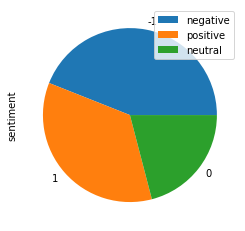

In [91]:
tweets_df.sentiment.value_counts().plot(kind='pie')
plt.legend(['negative','positive','neutral'])

In [77]:
tweets_df['clean_text'] =  tweets_df['clean_text'].astype(str)
tweet_df['clean_text'] = tweet_df['clean_text'].apply(lambda x: re.sub('\n', '', x))
tweets_df['clean_text'] =  tweets_df['clean_text'].apply(lambda x: x.lower())
tweets_df['sentiment'] =  tweets_df['sentiment'].astype(int)
tweets_df['hashtags'] = tweets_df['hashtags'].astype(str)
tweets_df['hashtags'] = tweets_df['hashtags'].apply(lambda x: x.lower())
tweets_df['hashtags']= tweets_df['hashtags'].apply(lambda x: x.translate(str.maketrans(' ', ' ', string.punctuation)))

In [78]:
flattened_words_df = pd.DataFrame(
    [word for words_list in tweets_df.clean_text
    for word in words_list.split(' ')],
    columns=['word'])

flattened_words_df

,word
0,\n\nlets
1,focus
2,in
3,one
4,very
...,...
426640,survey
426641,from
426642,taiwans
426643,national


Text(0, 0.5, 'count')

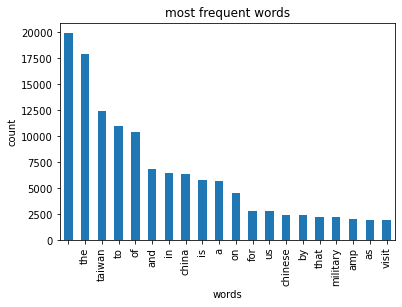

In [87]:
flattened_words_df.word.value_counts()[:20].plot(kind='bar')
plt.title('most frequent words')
plt.xlabel('words')
plt.ylabel('count')

Text(0.5, 1.0, 'Frequently Tweeted Words ')

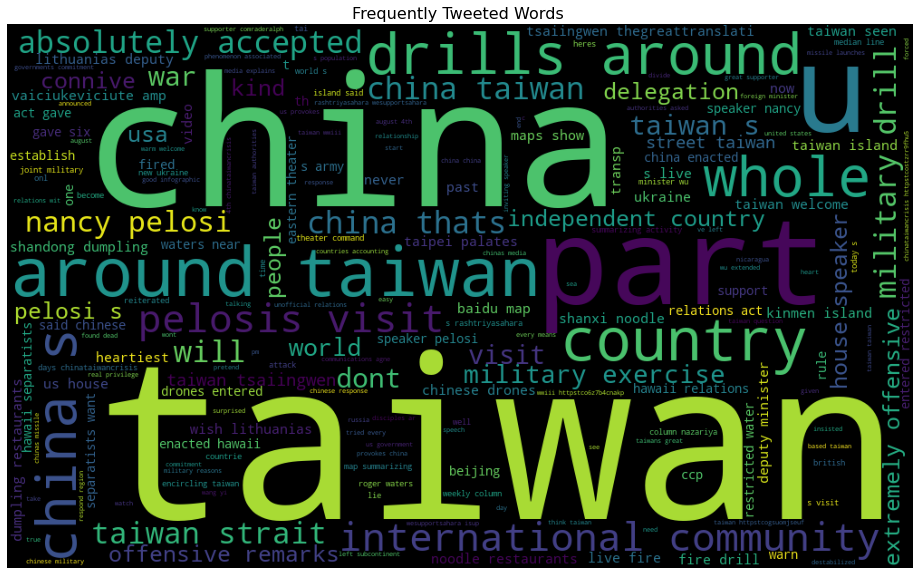

In [84]:
plt.figure(figsize=(20, 10))
plt.imshow(WordCloud(width=1000,height=600,stopwords=STOPWORDS).generate(' '.join(tweets_df.clean_text.values)))
plt.axis('off')
plt.title('Frequently Tweeted Words ',fontsize=16)
